In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
DATA_DIR = # insert your data directory path here. Data can be found here: https://zenodo.org/records/15039620
xy_train = pd.read_pickle(os.path.join(DATA_DIR, "ReducedPreProcessedCRISMDataset.pkl"))
xy_test = pd.read_pickle(os.path.join(DATA_DIR, "22MineralsinlierValidationDatatset.pkl"))

In [71]:
xy_train["mineralName"].unique()

array(['High-Calcium Pyroxene', 'Hydroxylated Fe-sulfate',
       'Monohydrated sulfate', 'Alunite', 'Polyhydrated sulfate',
       'Olivine', 'Margarite', 'Low-Calcium Pyroxene', 'Al-Smectite',
       'Mg-Smectite', 'Chlorite', 'Analcime', 'Gypsum', 'Jarosite',
       'Prehnite', 'Fe-Smectite', 'Serpentine', 'Fe/Ca-carbonate',
       'Mg-Carbonate', 'Illite/Muscovite', 'Kaolinite'], dtype=object)

In [ ]:
# drop class model is not trained on (Hydrated Silica?)
xy_test = xy_test[xy_test["classNames"] != 21]

In [26]:
# Get the mapping between mineral names and their one hot encoded values
class_ohe_mapping = {}

for class_num in xy_train["classLabel"].unique():
    class_ohe_mapping[int(class_num)] = xy_train[xy_train['classLabel'] == class_num]['mineralName'].unique()[0]

In [56]:
x_train = xy_train["Spectra"].to_numpy()
x_train = np.vstack(x_train)
y_train = xy_train["classLabel"].to_numpy()

x_test = xy_test["Spectra"].to_numpy()
x_test = np.vstack(x_test)
y_test = xy_test["classNames"].to_numpy()

In [33]:
rf_model = RandomForestClassifier(n_estimators=1024, criterion="entropy", n_jobs=-1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1024, n_jobs=-1)

In [57]:
y_pred = rf_model.predict(x_test)

In [60]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9220006184291899


In [ ]:
# Calculate performance metrics

true_unique_classes = np.unique(y_test)
predicted_unique_classes = np.unique(y_pred)
classes_to_calculate_f1 = np.unique(np.concatenate((true_unique_classes, predicted_unique_classes)))
string_labels = np.array([class_ohe_mapping[int(obs_class)] for obs_class in classes_to_calculate_f1])

report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {report['accuracy']}")
print(f"Macro F1: {report['macro avg']['f1-score']}")
print(f"Weighted F1: {report['weighted avg']['f1-score']}")
print(f"Precision: {report['macro avg']['precision']}")
print(f"Recall: {report['macro avg']['recall']}")

Accuracy: 0.9220006184291899
Macro F1: 0.7372856051076996
Weighted F1: 0.9301330651752803
Precision: 0.7153850766847315
Recall: 0.8291793549560034


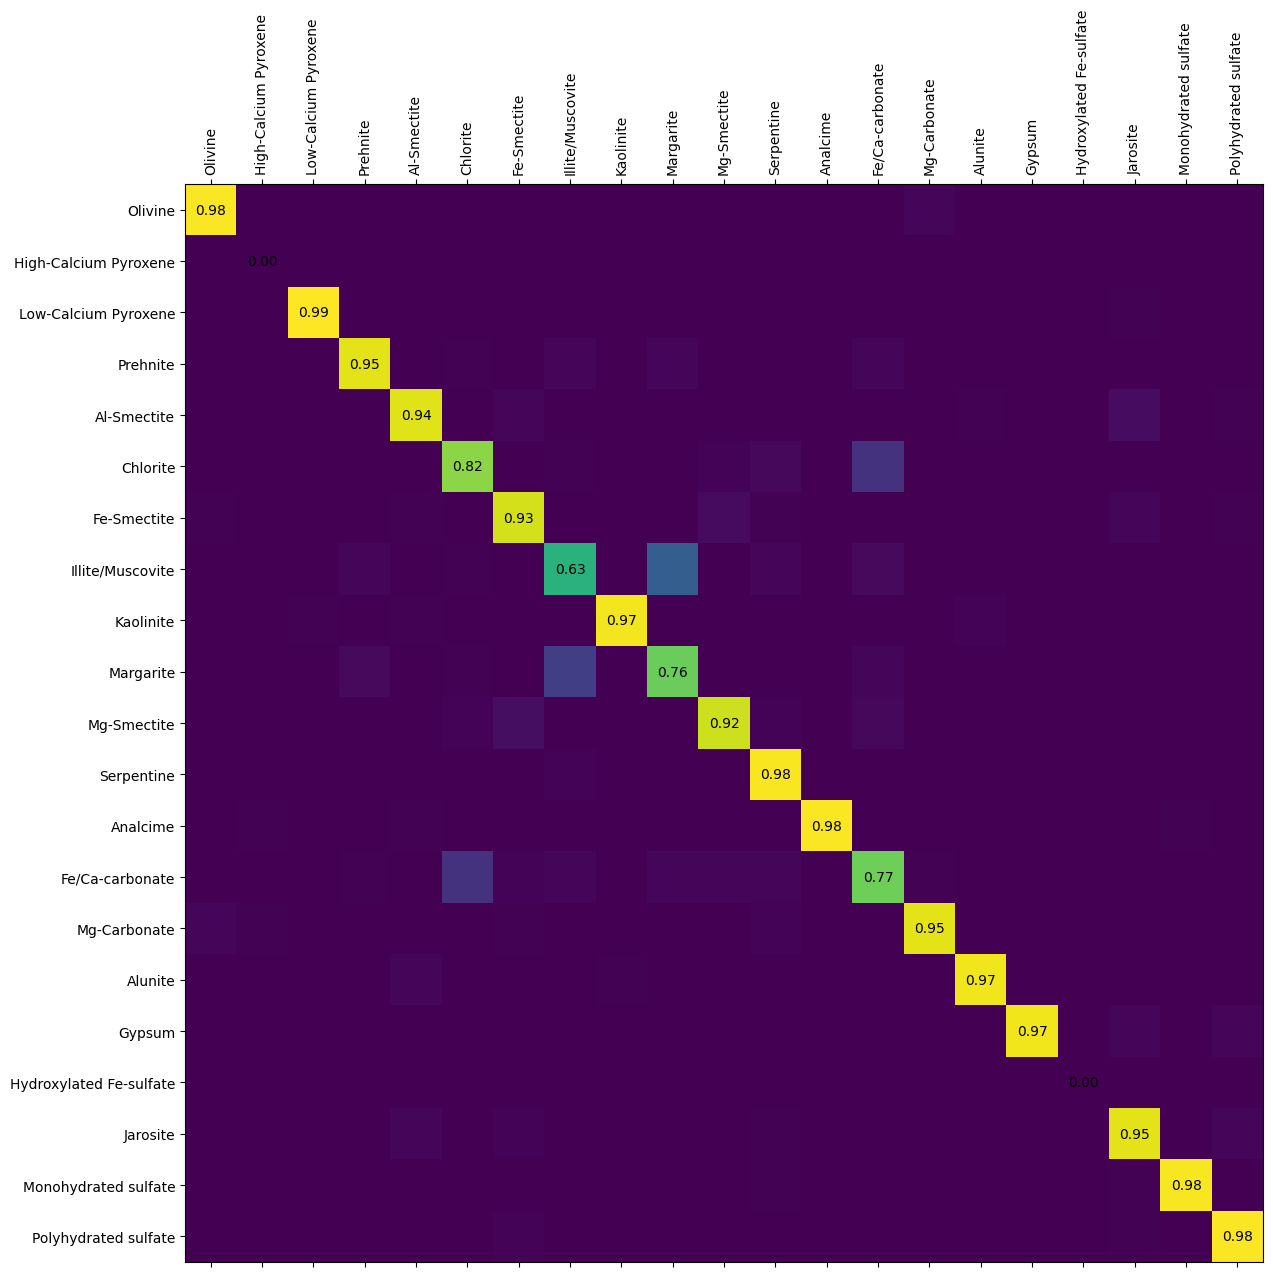

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize="true")
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(cm, cmap='viridis')
# add class labels to x and y axes
ax.set_xticks(range(len(string_labels)))
ax.set_yticks(range(len(string_labels)))
ax.set_xticklabels(string_labels, rotation=90)
ax.set_yticklabels(string_labels)
# plot the cm values in the boxes, rounded to 2dp
for i in range(len(string_labels)):
    for j in range(len(string_labels)):
        if i != j:
            continue
        ax.text(j, i, f"{cm[i, j]:.2f}", ha='center', va='center', color='black')


In [ ]:
# Write out the trained model to a pickle file
with open("trained_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f, protocol=5)